In [4]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from os.path import join
from scipy import signal
import gc
gc.collect()
from pathlib import Path
import ffmpeg

### Lectura de datos

In [5]:
path = './data/data_actalim'
file = 'actividad_alimentaria.wav'
labels = 'actividad_alimentaria.txt'

In [6]:
data, sr = librosa.load(join(path, file), offset=0.0, duration=60.0)

### Extraccion de features

In [7]:
import pandas as pd
pred_dir = './predict/classification/out.csv'
columns=['name','classes']
predictions = pd.read_csv(pred_dir, sep=',', header=0, names = columns)
predictions.name = predictions.name.str.replace('.wav', '')
predictions.name = predictions.name.astype('int32')
predictions.sort_values(by=['name'], inplace=True)

/tmp/ipykernel_9902/3876098096.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  predictions.name = predictions.name.str.replace('.wav', '')


In [8]:
total_events = len(predictions.classes)
perc_bite = len(np.where(predictions.classes == 0)[0])/total_events
perc_chew = len(np.where(predictions.classes == 1)[0])/total_events
perc_chewbite = len(np.where(predictions.classes == 2)[0])/total_events

### Read part of .wav and get label 

In [9]:
import pandas as pd
labels_dir = './data/data_actalim/actividad_alimentaria.txt'
columns=['start', 'end','classes']
predictions = pd.read_csv(labels_dir, sep='\t', header=None, names = columns)
predictions

,start,end,classes
0,"1180,948976","3415,667808",Rumination
1,"6008,459551","13633,445689",Grazing
2,"13674,043389","16493,738166",Rumination
3,"17748,576156","21838,471837",Rumination
4,"21823,108923","21838,471837",End


In [10]:
predictions.start= predictions.start.str.replace(',', '.')
predictions.end= predictions.end.str.replace(',', '.')
predictions.start = predictions.start.astype('float')
predictions.end = predictions.end.astype('float')

In [11]:
Ts = 1/sr
N = data.shape[0]  
t = np.arange(0,Ts*N,Ts) 

In [12]:
offset = 0
duration_step = 3 * 60.0
duration = librosa.get_duration(filename=join(path, file))
steps = np.int(duration/duration_step)
for i in range(8,9):
    offset = i * duration_step
    data, sr = librosa.load(join(path, file), offset=offset, duration=duration_step)
    Ts = 1/sr
    N = data.shape[0]  
    print('Offset: ', offset)
    t = np.arange(offset,Ts*N + i * duration_step,Ts)
    print('Len data: ', len(data))
    print('Sr: ', sr)
    print('Start: ', t[0])
    print('End: ', t[-1]) 
    for j in range(0, len(predictions.classes)):
        if (t[0]>= predictions.start[j]) & (t[0]< predictions.end[j]):
            part_class = predictions.classes[j]
            print('Class: ', part_class)

/tmp/ipykernel_9902/2756848003.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  steps = np.int(duration/duration_step)


Offset:  1440.0
Len data:  3969000
Sr:  22050
Start:  1440.0
End:  1619.9999549553168
Class:  Rumination


In [13]:
from detection import run as det_run
offset = 0
duration_step = 3 * 60.0
duration = librosa.get_duration(filename=join(path, file))
steps = np.int(duration/duration_step)
for i in range(100,101):
    offset = i * duration_step
    data, sr = librosa.load(join(path, file), offset=offset, duration=duration_step)
    Ts = 1/sr
    N = data.shape[0]  
    print('Offset: ', offset)
    t = np.arange(offset,Ts*N + i * duration_step,Ts)
    print('Len data: ', len(data))
    print('Sr: ', sr)
    print('Start: ', t[0])
    print('End: ', t[-1]) 
    for j in range(0, len(predictions.classes)):
        if (t[0]>= predictions.start[j]) & (t[0]< predictions.end[j]):
            part_class = predictions.classes[j]
            print('Class: ', part_class)
    event_list, data_filt = det_run(data, sr)
    print('Event List: ', event_list)

/tmp/ipykernel_9902/476596591.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  steps = np.int(duration/duration_step)


Offset:  18000.0
Len data:  3969000
Sr:  22050
Start:  18000.0
End:  18179.999951345533
Class:  Rumination
Events detected and saved
Event List:  [(0.5689307708308642, 1.2649434691633608), (1.4240781631211137, 2.1200908614536105), (2.875007868336534, 3.5710205666690302), (3.750518072418166, 4.4465307707506625), (4.5311983445270085, 5.227211042859506), (5.276912630241295, 5.972925328573792), (6.044214217542883, 6.74022691587538), (6.877094036136986, 7.573106734469484), (7.7221280497424285, 8.418140748074926), (8.54430492049073, 9.240317618823225), (10.01759290235014, 10.713605600682635), (10.833828730014538, 11.529841428347034), (11.60103961436828, 12.297052312700776), (12.402853673325197, 13.098866371657692), (14.00303507922089, 14.699047777553385), (14.784259569016807, 15.480272267349303), (16.359089500989594, 17.05510219932209), (17.19051807241817, 17.886530770750664), (17.92711671187395, 18.623129410206445), (18.75546138307576, 19.451474081408257), (19.514690408019074, 20.2107031063

Text(0, 0.5, 'Amplitude')

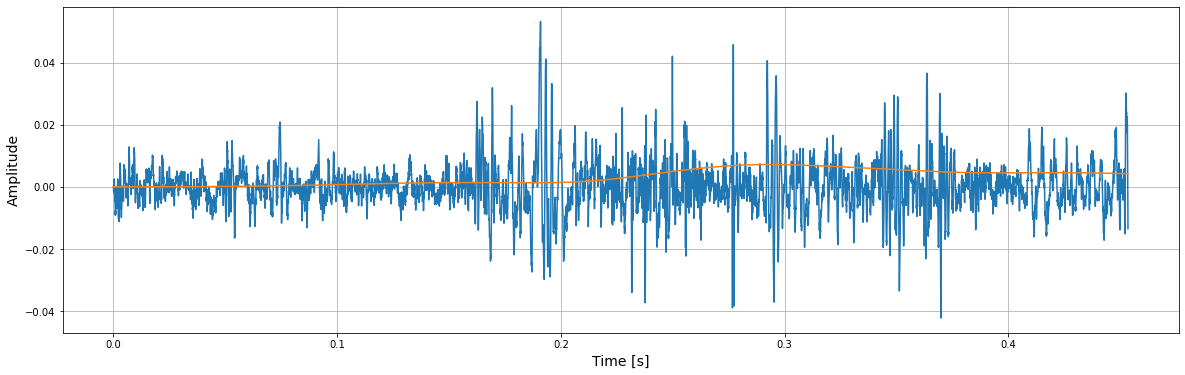

In [14]:
t_set = np.arange(0,Ts*N,Ts)
x = 10000
fig, ax = plt.subplots(1, 1, figsize=(20,6))
ax.plot(t_set[:x], data[:x])
ax.plot(t_set[:x], data_filt[:x]*10)
ax.grid(True)
ax.set_xlabel('Time [s]', fontsize=14)
ax.set_ylabel('Amplitude', fontsize=14)
#for idx in range(len(event_list)):
#        plt.axvspan(event_list[idx][0], event_list[idx][1], color='orange', alpha=0.2, lw=0)

In [16]:
from classification import run as class_run
offset = 0
duration_step = 3 * 60.0
duration = librosa.get_duration(filename=join(path, file))
steps = np.int(duration/duration_step)
for i in range(8,9):
    offset = i * duration_step
    data, sr = librosa.load(join(path, file), offset=offset, duration=duration_step)
    Ts = 1/sr
    N = data.shape[0]  
    print('Offset: ', offset)
    t = np.arange(offset,Ts*N + i * duration_step,Ts)
    print('Len data: ', len(data))
    print('Sr: ', sr)
    print('Start: ', t[0])
    print('End: ', t[-1]) 
    for j in range(0, len(predictions.classes)):
        if (t[0]>= predictions.start[j]) & (t[0]< predictions.end[j]):
            part_class = predictions.classes[j]
            print('Class: ', part_class)
    event_list, data_filt = det_run(data, sr)
    #print('Event List: ', event_list)
    t_set = np.arange(0,Ts*N,Ts)
    output_list = class_run(data,event_list, sr, t_set)
    print('Class List: ', output_list)

    

/tmp/ipykernel_9902/1333869084.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  steps = np.int(duration/duration_step)


Offset:  1440.0
Len data:  3969000
Sr:  22050
Start:  1440.0
End:  1619.9999549553168
Class:  Rumination
Events detected and saved
Class List:  [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]


In [35]:
output_array = np.array(output_list)


In [43]:
total_events = []
perc_bite = []
perc_chew = []
perc_chewbite = []
part_classes = []

In [46]:
events = len(output_array)
total_events.append(len(output_array))
perc_bite.append(len(np.where(output_array == 0)[0])/events)
perc_chew.append(len(np.where(output_array  == 1)[0])/events)
perc_chewbite.append(len(np.where(output_array  == 2)[0])/events)
part_classes.append(part_class)

In [42]:
df = pd.DataFrame({'events' : [], 'perc_bite' : [], 'perc_chew' : [], 'perc_chewbite' : [], 'class' : []})

In [47]:
df['events']= total_events

### Train model

In [89]:
df = pd.read_csv('./predict/act_alimentaria/out_clas_alim.csv', sep=',', header=0)

In [90]:
df['class'].replace(['Rumination', 'Grazing', 'End', 'noclass'], [0, 1, 2, 3], inplace= True)

In [91]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

In [92]:
df = df.drop(df[df['class'] == 3].index)

In [93]:
df = df.drop(df[df['class'] == 2].index)

In [94]:
X_train = df[['events' , 'perc_bite', 'perc_chew' , 'perc_chewbite']]
y_train = df['class']

7      0
8      0
9      0
10     0
11     0
      ..
115    0
116    0
117    0
118    0
119    0
Name: class, Length: 91, dtype: int64

In [95]:
# Genera una nueva particion desde el conjunto de train
X_train_opt, X_optim, y_train_opt, y_optim = train_test_split(X_train,
                                                              y_train,
                                                              test_size=0.33,
                                                              random_state=42)

    
# Se define el modelo
model = make_pipeline(
                          StandardScaler(),
                          #DecisionTreeClassifier(max_depth=5, min_samples_leaf=1),
                          #MLPClassifier(random_state=42, max_iter=2000, early_stopping=False, n_iter_no_change=100)
                          RandomForestClassifier(n_estimators=1, random_state=42)
                     )

# Se entrena el modelo
model.fit(X_train_opt, y_train_opt)

# Se prueba con la partición de optimización
y_pred_optim = model.predict(X_optim)

sc = balanced_accuracy_score(y_optim, y_pred_optim)
print(f"{sc:.3f} balanced accuracy")

1.000 balanced accuracy


In [96]:
y_optim

62     1
44     1
77     0
117    0
7      0
48     1
61     1
88     0
17     0
66     1
114    0
57     1
99     0
84     0
34     1
11     0
40     1
50     1
71     1
86     0
37     1
89     0
106    0
52     1
55     1
18     0
87     0
90     0
53     1
105    0
16     0
Name: class, dtype: int64

In [97]:
# Reporte de clasificación
report = classification_report(y_optim,
                               y_pred_optim, 
                               target_names=['Rumination', 'Grazing'])

print(report)

              precision    recall  f1-score   support

  Rumination       1.00      1.00      1.00        17
     Grazing       1.00      1.00      1.00        14

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



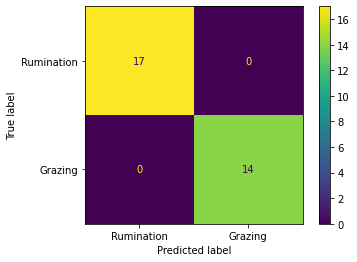

In [99]:
# matriz de confusión
cm = confusion_matrix(y_optim, y_pred_optim)
ConfusionMatrixDisplay(cm,
                       display_labels=['Rumination', 'Grazing']).plot()
plt.grid(False)
plt.show()

In [121]:
start = []
end = []
label = []
for i in y_optim.index:
    start.append(i * 3 * 60.0)
    end.append(i * 3 * 60.0 + 3*60.0)
    if y_optim[i] == 0:
        label.append('Rumination')
    else:
        label.append('Grazing')

In [122]:
df = pd.DataFrame({'start' : [], 'end' : [], 'class' : []})


In [123]:
df['start'] = start
df['end'] = end
df['label'] = label

In [125]:
df.sort_values(by=['start'], inplace=True)

In [126]:
df

,start,end,class,label
4,1260.0,1440.0,NaN,Rumination
15,1980.0,2160.0,NaN,Rumination
30,2880.0,3060.0,NaN,Rumination
8,3060.0,3240.0,NaN,Rumination
25,3240.0,3420.0,NaN,Rumination
14,6120.0,6300.0,NaN,Grazing
20,6660.0,6840.0,NaN,Grazing
16,7200.0,7380.0,NaN,Grazing
1,7920.0,8100.0,NaN,Grazing
5,8640.0,8820.0,NaN,Grazing
